In [1]:
import yt
import matplotlib.pyplot  as plt
import numpy as np
import astropy

In [314]:
def get_yt_data_1d(filename):

    j_idx = 0
    k_idx = 0
    fields_list = ["x", "dens", "pres", "temp", "cham", "targ"]

    data_yt = yt.load(filename)
    data_yt_map = data_yt.covering_grid(
        level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions
    )

    data_dict = {}
    for f in fields_list:
        data_dict[f] = data_yt_map[f][:,j_idx,k_idx]
    return data_dict

In [172]:
# filedir = '/Users/yao/sshfs_mesopsl_data/job.64739/'  # AMR_r2_dtmax_1e-12
# filedir = '/Users/yao/sshfs_mesopsl_data/job.64751/' # AMR_r3_dtmax_1e-13 & job.64750
filedir = '/Users/yao/sshfs_mesopsl_data/job.64772/'   # AMR_r3 w/o dt_factors for diffusion and heatX
filename = 'lasslab_hdf5_chk_0005'  # check the mass fraction for the negative energy

In [173]:
data_yt = yt.load(filedir+filename)
data_yt_map = data_yt.covering_grid(level=0, left_edge=[0, 0.0, 0.0], dims=data_yt.domain_dimensions)
time_now = np.array(data_yt.current_time)*1e9

yt : [INFO     ] 2024-02-20 16:59:45,154 Particle file found: lasslab_hdf5_chk_0005
yt : [INFO     ] 2024-02-20 16:59:45,383 Parameters: current_time              = 2.5000026263292483e-09
yt : [INFO     ] 2024-02-20 16:59:45,384 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-02-20 16:59:45,385 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-20 16:59:45,385 Parameters: domain_right_edge         = [1.5 1.  1. ]
yt : [INFO     ] 2024-02-20 16:59:45,386 Parameters: cosmological_simulation   = 0


In [174]:
x    = data_yt_map['x'][:,0,0]           # cm
dens = data_yt_map['density'][:,0,0]     # g/cm3
Te   = data_yt_map['tele'][:,0,0]        # K
Ti   = data_yt_map['tion'][:,0,0]        # K
depo = data_yt_map['depo'][:,0,0]        # K
cham = data_yt_map['cham'][:,0,0]        # 
targ = data_yt_map['targ'][:,0,0]        # 

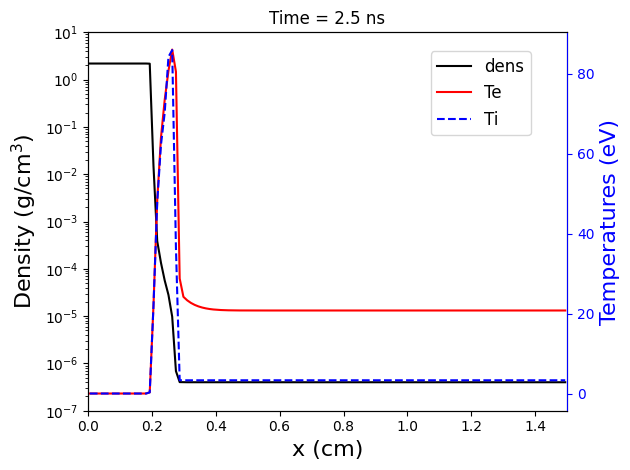

In [175]:
fig, ax1 = plt.subplots()

ax1.semilogy(x, dens, '-k')
ax1.set_ylabel(r'Density (g/cm$^3$)', color='k', fontsize=16)
ax1.tick_params(axis='y',color='k', labelcolor='k')
# ax1.legend()
ax1.set_ylim([1e-7,10])
ax1.set_xlim([0.0,1.5])
ax1.set_xlabel('x (cm)', fontsize=16)

ax2 = ax1.twinx()
ax2.plot(x, Te/11600, '-r', label='Te')
ax2.plot(x, Ti/11600, '--b', label='Ti')
ax2.set_ylabel('Temperatures (eV)', color='b', fontsize=16)
ax2.tick_params(axis='y', color='b', labelcolor='b')
ax2.spines['right'].set_color('b')
ax2.spines['left'].set_color('k')
# ax2.set_ylim([0,50])

fig.legend(['dens', 'Te','Ti',], bbox_to_anchor=(0.85, 0.9),fontsize=12)
ax1.set_title('Time = {:.1f} ns'.format(time_now))

fig.tight_layout()
fig.savefig(filedir+'profile_{:.1f}.png'.format(time_now),dpi=300)

In [10]:
np.array(data_yt.current_time)

array(5.00035258e-08)

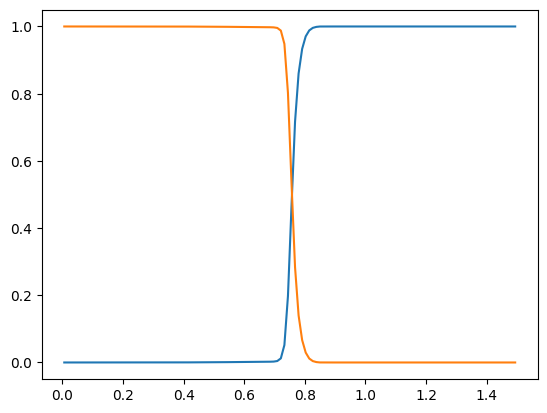

In [317]:
plt.plot(x, cham)
plt.plot(x, targ)

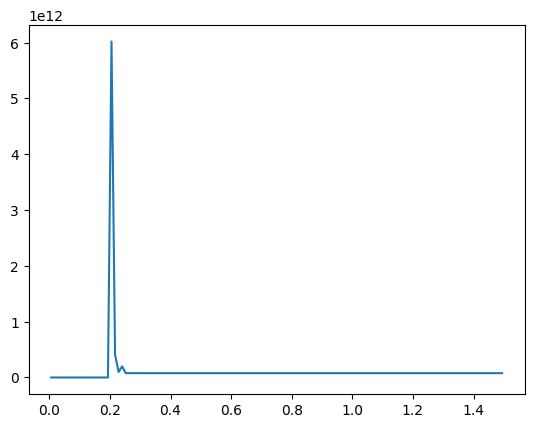

In [76]:
plt.plot(x,depo)

In [67]:
depo

unyt_array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
            0.00000000e+00, 0.00000000e+00, 6.12472508e+12,
            7.27950819e+11, 5.04655970e+11, 6.79420690e+11,
            7.38636268e+11, 7.54405474e+11, 7.58797369e+11,
            7.59850664e+11, 7.60068375e+11, 7.60111038e+11,
            7.60121983e+11, 7.60127881e+11, 7.60132862e+11,
            7.60137777e+11, 7.60142561e+11, 7.60147345e+11,
            7.60152064e+11, 7.60156717e+11, 7.60161370e+11,
            7.60165892e+11, 7.60170480e+11, 7.60174936e+11,
            7.60179393e+11, 7.60183783e+11, 7.60188109e+11,
            7.60192434e+11, 7.60196694e+11, 7.60200888e+11,
            7.60205017e+11, 7.60209146e+11, 7.60213209e+11,
            7.60217207e+11, 7.60221204e+

In [69]:
me = 9.1e-31
mp = 1836*me
mi = 14*mp

In [117]:
5.6e-7 / (mi*1e3)

2.394120041178865e+16

In [118]:
filename = '/Users/yao/Desktop/Data/lasslab_hdf5_plt_cnt_1mbar/lasslab_hdf5_plt_cnt_0050'
data_yt = yt.load(filename)

yt : [INFO     ] 2024-02-19 15:29:59,798 Parameters: current_time              = 5.0003525780161985e-08
yt : [INFO     ] 2024-02-19 15:29:59,798 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-02-19 15:29:59,799 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-19 15:29:59,799 Parameters: domain_right_edge         = [1.5 1.  1. ]
yt : [INFO     ] 2024-02-19 15:29:59,800 Parameters: cosmological_simulation   = 0


In [119]:
filename = '/Users/yao/Desktop/Data/lasslab_hdf5_chk_0050'
data_yt = yt.load(filename)

yt : [INFO     ] 2024-02-19 15:30:13,039 Particle file found: lasslab_hdf5_chk_0050
yt : [INFO     ] 2024-02-19 15:30:13,067 Parameters: current_time              = 5.0003525780161985e-08
yt : [INFO     ] 2024-02-19 15:30:13,068 Parameters: domain_dimensions         = [128   1   1]
yt : [INFO     ] 2024-02-19 15:30:13,068 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-19 15:30:13,069 Parameters: domain_right_edge         = [1.5 1.  1. ]
yt : [INFO     ] 2024-02-19 15:30:13,069 Parameters: cosmological_simulation   = 0


In [124]:
data_yt.fields_detected

True

In [178]:
pressure_in_bar = 1e-2 # 10 mbar
kb = 1.4e-23           # J/K
T0 = 300               # K
pressure_in_Pa  = pressure_in_bar * 1e5
number_density  = pressure_in_Pa / (kb * T0)  # m^-3

In [180]:
number_density/1e6

2.380952380952381e+17

In [182]:
rho = number_density * mp * 14 # kg/m^3
rho*1e-3 # g/cm^3

5.569200000000001e-06

In [183]:
rho = number_density * mp * 1 # kg/m^3
rho*1e-3 # g/cm^3

3.978000000000001e-07